### Logistic regression on ‘Breast Cancer Classification’ data set. The objective is to classify if diagnosis is ‘Malign’ or ‘Benign’. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import roc_curve, auc, confusion_matrix
data = pd.read_csv('Data/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Count of Benign:  357
Count of Malignant :  212


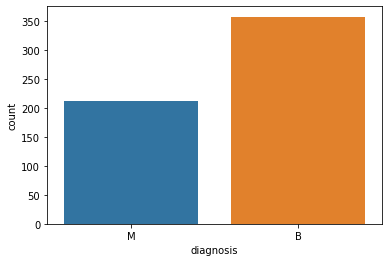

In [4]:
y = data.diagnosis #target variable
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )


ax = sns.countplot(y,label="Count") 
B, M = y.value_counts()
print('Count of Benign: ',B)
print('Count of Malignant : ',M)

In [5]:
# Encode for string labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(y)
y = label_encoder.transform(y)

### Check correlation

<AxesSubplot:>

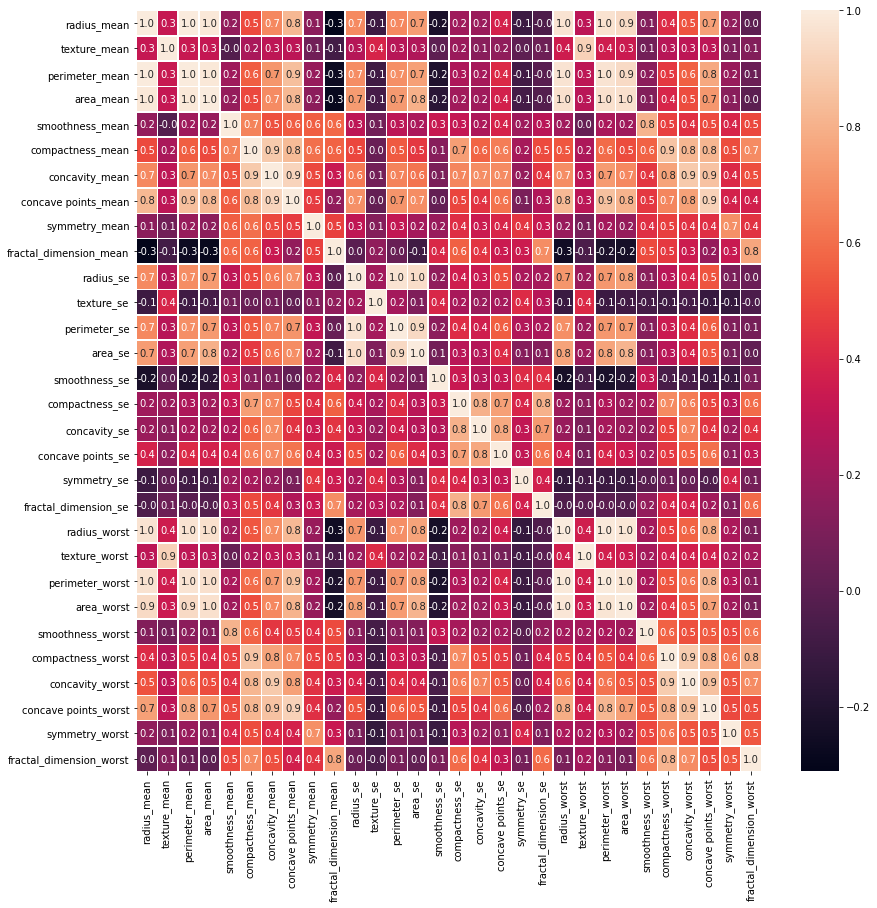

In [6]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [7]:
#From this matrix we can drop the columns with 1 as correlation score
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se'
             ,'radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se',
             'concave points_se','texture_worst','area_worst']
x2 = x.drop(drop_list,axis = 1 )

<AxesSubplot:>

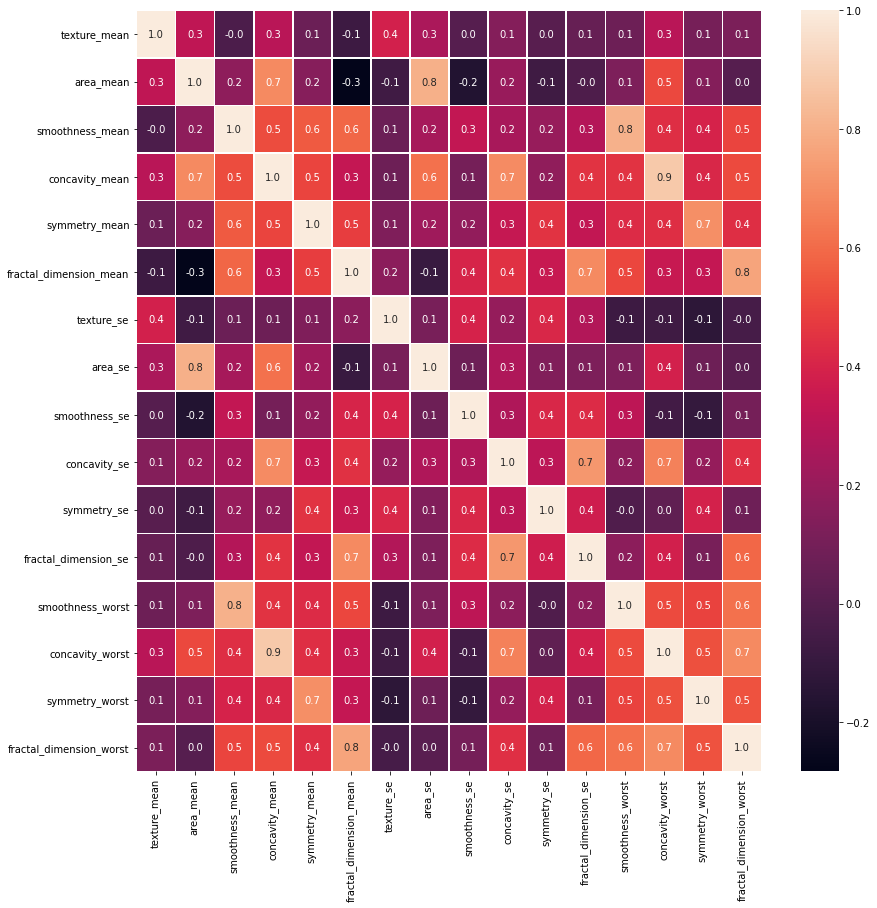

In [8]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [9]:
def split_data(X,Y,size):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=42)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = split_data(x2,y,0.3)


In [10]:
def model_data(model,X,Y,x_test):
    model.fit(X, Y)
    x_pred = model.predict(X)      #predictions on train data
    y_pred = model.predict(x_test) #predictions on test data
    return x_pred,y_pred

logreg = LogisticRegression()
x_pred, y_pred = model_data(logreg,x_train,y_train,x_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
def model_metrics(X,Y):
    confusion_matrix = sklearn.metrics.confusion_matrix(Y,X)
    print('Accuracy: {:.2f}'.format(accuracy_score(Y,X)))
    print('Confusion Matrix: \n',confusion_matrix)
print('Performance of logistic regression classifier on train set:')
model_metrics(y_train,x_pred)
print('\n')
print(" — — — — — — — — — — — — — — — ")
print('Performance of logistic regression classifier on test set:')
model_metrics(y_test, y_pred)

Performance of logistic regression classifier on train set:
Accuracy: 0.93
Confusion Matrix: 
 [[240  19]
 [  9 130]]


 — — — — — — — — — — — — — — — 
Performance of logistic regression classifier on test set:
Accuracy: 0.96
Confusion Matrix: 
 [[104   2]
 [  4  61]]


In [12]:
# y_pred = label_encoder.inverse_transform(y_pred)
# y_test = label_encoder.inverse_transform(y_test)

In [21]:
label_encoder.classes_

array(['B', 'M'], dtype=object)

In [13]:
from sklearn.metrics import classification_report
target_names = ['B', 'M']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           B       0.98      0.96      0.97       108
           M       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [14]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9656084656084657

In [15]:
def plot_roc(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

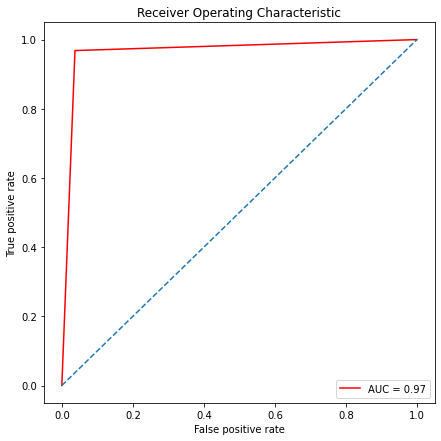

In [16]:
plot_roc(roc_auc)

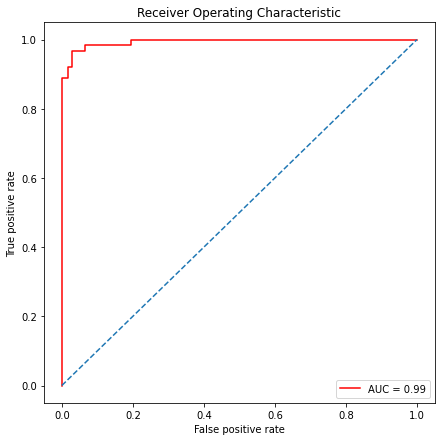

In [19]:
### Linear Discriminant Analysis (LDA) 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train.ravel())

y_prob_lda = lda.predict_proba(x_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

plot_roc(roc_auc_lda)

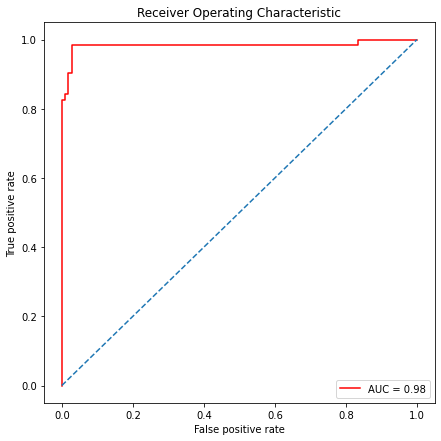

In [20]:
### Quadratic Discriminant Analysis (QDA) 

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(x_train, y_train.ravel())

y_prob_qda = qda.predict_proba(x_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)

qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

plot_roc(roc_auc_qda)

The LDA method gives us the best result